
Sales summary by product:
 product  total_qty  revenue
Widget A         15   299.85
Widget B          9   269.91
Widget C         15   149.85


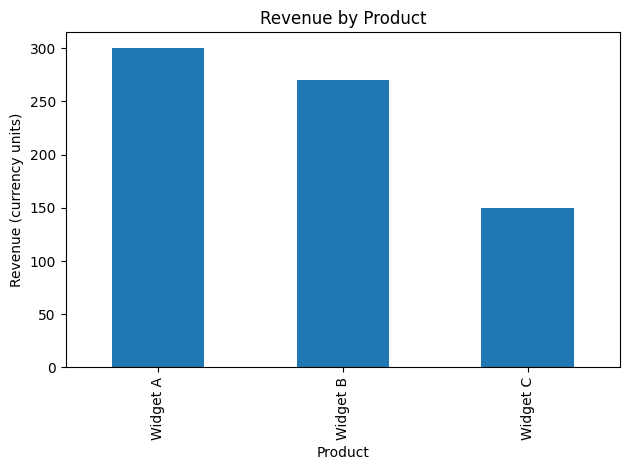

In [1]:
# sales_summary.py
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def get_sales_summary(db_path="sales_data.db"):
    conn = sqlite3.connect(db_path)
    query = """
    SELECT
      product,
      SUM(quantity) AS total_qty,
      SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
    ORDER BY revenue DESC;
    """
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

def print_and_plot(df):
    print("\nSales summary by product:")
    print(df.to_string(index=False))

    ax = df.plot(kind='bar', x='product', y='revenue', legend=False)
    ax.set_xlabel("Product")
    ax.set_ylabel("Revenue (currency units)")
    ax.set_title("Revenue by Product")
    plt.tight_layout()
    plt.savefig("sales_chart.png")   # saves the chart file
    plt.show()                      # shows the chart in Jupyter or desktop

if __name__ == "__main__":
    df = get_sales_summary()
    print_and_plot(df)
